# ANN with numpy

---
                                                                  written by Yang, Soyoung
                                                                           2017.07.30 v1.0
                                                                           2017.08.08 v1.1


ANN caculation to see how backpropagation, gradient descent really work.
- Data generation with numpy
- Feed forward using dot product and sigmoid function
- Backpropagation with Gradient Descent directly using numpy
- Optimize hyper-parameter with cost


reference : 
- [ANN in stephencwelch github io](https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%204%20Backpropagation.ipynb)

## 0. refenced youtubes

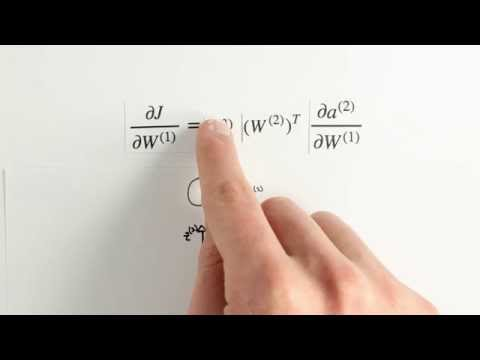

In [31]:
from IPython.display import YouTubeVideo
YouTubeVideo('GlcnxUlrtek')

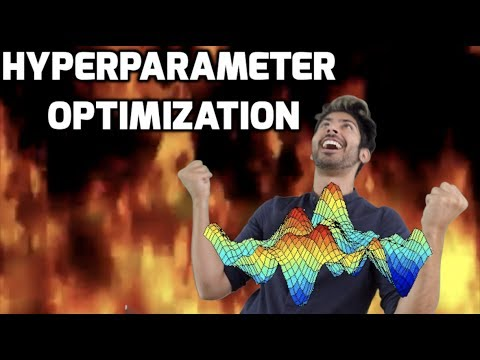

In [32]:
YouTubeVideo('ttE0F7fghfk')

---
## 1. import

In [33]:
# import necessary functions
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## 2. ANN model

In [34]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 128
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.hiddenLayerSize)
        self.W3 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
        self.b1 = np.random.randn(1, self.hiddenLayerSize)
        self.b2 = np.random.randn(1, self.hiddenLayerSize)
        self.b3 = np.random.randn(1, self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1) + self.b1
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2) + self.b2
        self.a3 = self.sigmoid(self.z3) 
        self.z4 = np.dot(self.a3, self.W3) + self.b3
        yHat = self.z4 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J[0]
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        # don't get sigmoid prime in output layer. 
        # we don't use activation function in output layer
        delta4 = -(y - self.yHat)
        dJdW3 = np.dot(self.a3.T, delta4)
        dJdb3 = np.mean(delta4, axis=0)
        
        # after then, we need sigmoid prime because of activate function(sigmoid)
        delta3 = np.dot(delta4, self.W3.T) * self.sigmoidPrime(self.z3)
        dJdW2 = np.dot(self.a2.T, delta3) 
        dJdb2 = np.mean(delta3, axis=0)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        dJdb1 = np.mean(delta2, axis=0)
        
        return dJdW1, dJdW2, dJdW3, dJdb1, dJdb2, dJdb3
    
    
    def gradient_descent(self, lr, dJdW1, dJdW2, dJdW3, dJdb1, dJdb2, dJdb3):
        
        self.W1 = self.W1 - lr*dJdW1
        self.W2 = self.W2 - lr*dJdW2
        self.W3 = self.W3 - lr*dJdW3
        
        self.b1 = self.b1 - lr*dJdb1
        self.b2 = self.b2 - lr*dJdb2
        self.b3 = self.b3 - lr*dJdb3
        
    # not necessary but worthy to reconsider what is hyper parameter
    def opt_hyper_params(self, X, y):
        best_cost = 100000
        best_params  = {'input_dim': None, 'hidden_dim': None}
        
        for dim_in in range(1, 30):
            for dim_hid in range(128, 527, 40):
                self.inputLayerSize = dim_in
                self.hiddenLayerSize = dim_hid
                
                cost = self.costFunction(X, y)
                
                if cost < best_cost:
                    best_params['input_dim'] = dim_in
                    best_params['hidden_dim'] = dim_hid
                    best_cost = cost
                    
        self.inputLayerSize = best_params['input_dim']
        self.hiddenLayerSize = best_params['hidden_dim']
                

## 3. Train model

In [41]:
def train(epoch, lr, X, y):
    NN = Neural_Network()
    print('Neaural Network is formed.')
    
    # not necessary
    NN.opt_hyper_params(X, y)
    print('\nHyper parameter optimization is done.')
    print(' Input layer size: {} \t Hidden layer size: {}'.format(NN.inputLayerSize, NN.hiddenLayerSize))
    
    print('\nTraining ANN...')
    
    costs = [] # list of cost for each epoch
    
    # start training
    for epoch in range(epoch+1):
        # calculate gradients
        dJdW1, dJdW2, dJdW3, dJdb1, dJdb2, dJdb3 = NN.costFunctionPrime(X,y)
        
        # update Weight with gradient
        NN.gradient_descent(lr, dJdW1, dJdW2, dJdW3, dJdb1, dJdb2, dJdb3)
        
        cost = NN.costFunction(X,y)
        costs.append(cost)
        print("epoch: {}, cost: {}".format(epoch, cost))
    
    # plot train process, showing cost of each epoch
    x_axis = np.arange(0, epoch+1)
    plt.plot(x_axis, costs)
    plt.xlabel = 'epoch'
    plt.ylabel = 'cost'
    plt.grid(1)
    plt.show()

## 4. generate data

In [27]:
# data generation
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

## 5. Training ANN

Neaural Network is formed.

Hyper parameter optimization is done.
 Input layer size: 1 	 Hidden layer size: 128

Training ANN...
epoch: 0, cost: 5933.472489834196
epoch: 1, cost: 3540.8575188902073
epoch: 2, cost: 2228.5982461062836
epoch: 3, cost: 1429.223692279967
epoch: 4, cost: 925.6042871476561
epoch: 5, cost: 606.2889378255198
epoch: 6, cost: 400.25000691562343
epoch: 7, cost: 259.3188604477206
epoch: 8, cost: 178.9924649009351
epoch: 9, cost: 138.76910143000458
epoch: 10, cost: 115.92863439787922
epoch: 11, cost: 101.37111712334186
epoch: 12, cost: 91.51847294592724
epoch: 13, cost: 84.52556138466063
epoch: 14, cost: 79.33907757939932
epoch: 15, cost: 75.33280922251414
epoch: 16, cost: 72.12338146081413
epoch: 17, cost: 69.46797021015644
epoch: 18, cost: 67.20623754065832
epoch: 19, cost: 65.22784888671472
epoch: 20, cost: 63.45449346818753


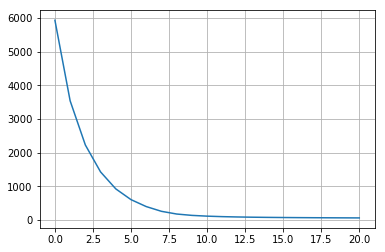

In [43]:
train(20, 0.001, X, y)

---
## + plot sigmoid

In [7]:
# setting basic neural network
NN = Neural_Network()

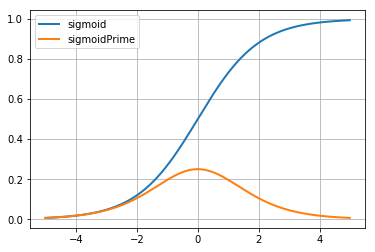

In [8]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()